# Exercise: Linear Maps

<html>
<div class="alert alert-info" role="alert" style="margin-top: 10px">
In this exercise you should implement the drift, dipole, quadrupole (+thin), solenoid, fringe field and combined function magnet maps and apply them to a Gaussian centered and off-centered beam. Plot the phase spaces.
</div>
</html>

In order to build maps we need some properties that are globally available. Those are the Lorentz factor $\gamma$, the particle mass $m\ [MeV/c^2]$ and the particle charge $q\ [e]$.
Those parameters are given in ```Parameter.py``` and initialized by
```Python
import AcceLEGOrator.Parameter as p

p.ekin = # ...
p.mass = # ...
p.charge = # ...
```
You can use the function
```
Physics.getGamma(ekin, epot)
```
to obtain the Lorentz factor.
Instantiante a proton species and set all global variables. Take any value for the kinetic energy [MeV].

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Create a proton particle.</li>
        </ul>
    </div>
</html>

In [2]:
from AcceLEGOrator import Proton, Physics
import AcceLEGOrator.Parameter as p

particle = Proton()

# Define the parameters using the particle
p.ekin    = 100 # MeV
p.mass    = particle.mass  # MeV / c^2
p.charge  = particle.charge # e
p.gamma_0 = Physics.getGamma(p.ekin, p.mass)
print ( 'Gamma = ', p.gamma_0)

Gamma =  1.1065788932581766


<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Create a particle distribution like in the previous exercise.</li>
        </ul>
    </div>
</html>

In [3]:
from AcceLEGOrator import Gaussian, Bunch, Proton
import numpy as np

mu = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
C  = np.array([[ 16.0, 0.0,  0,  0,  0, 0],
               [ 0.0, 1.0,  0,  0,  0, 0],
               [ 0,  0, 16.0,  0.0,  0, 0],
               [ 0,  0, 0.0, 1,  0, 0],
               [ 0,  0,  0,  0, 0.709, 0.0],
               [ 0,  0,  0,  0,  0.0, 0.0981]])
D = Gaussian(mu, C)

bunch = Bunch()
bunch.create(D, 1000, particle, p.ekin)

# Maps
All linear maps are derived classes of the base class `Map`. Implement the necessary member functions.
```Python
class Map(object):
    
    # @param R its 6x6 matrix
    # @param length of element [m]
    def __init__(self, R, length):
        self.R = np.matrix(R)
        self.length = length
    
    # Print map properties, like its type,
    # magnetic field strength, length, etc.
    def __str__(self):
        return '\n'
    
    # @return a new instance with specific length
    @abstractmethod
    def get(self, length):
        pass
```
If you need any global variable for the construction of the 6x6 matrix, call them by e.g. ```p.gamma_0```.
Apply the maps (separately) to the bunch by
```Python
M = Drift(1.0)
bunch.particles =  M * bunch.particles
```

Plot the initial and final phase space. You can use the function

```Python
# @param ax is the axis to plot on
# @param xvar phase space variable x-axis
# @param yvar phase space variable y-axis
# @param label for legend
def plot_phase_space(ax, xvar, yvar, label)
```
from ```Plots.py```

## Drift
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Implement the drift map as given in the lecture slides.</li>
        </ul>
    </div>
</html>

In [4]:
from AcceLEGOrator import Map, Physics

class Drift(Map):
    
    # @param length in [m]
    def __init__(self, length):
        beta_0 = Physics.getBeta(p.gamma_0)
        
        f = length / (beta_0 * p.gamma_0) ** 2
        
        R = np.matrix([[1, length, 0, 0, 0, 0],
                      [0, 1, 0, 0, 0, 0],
                      [0, 0, 1, length, 0, 0],
                      [0, 0, 0, 1, 0, 0],
                      [0, 0, 0, 0, 1, f],
                      [0, 0, 0, 0, 0, 1]])
        
        super(Drift, self).__init__(R, length)
    
    
    def __str__(self):
        return 'Drift(L = ' + str(self.length) + ' [m])\n'
    
    def get(self, length):
        return Drift(length)

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Apply the map on the created bunch. Plot initial and final phase space.</li>
        </ul>
    </div>
</html>

<IPython.core.display.Javascript object>


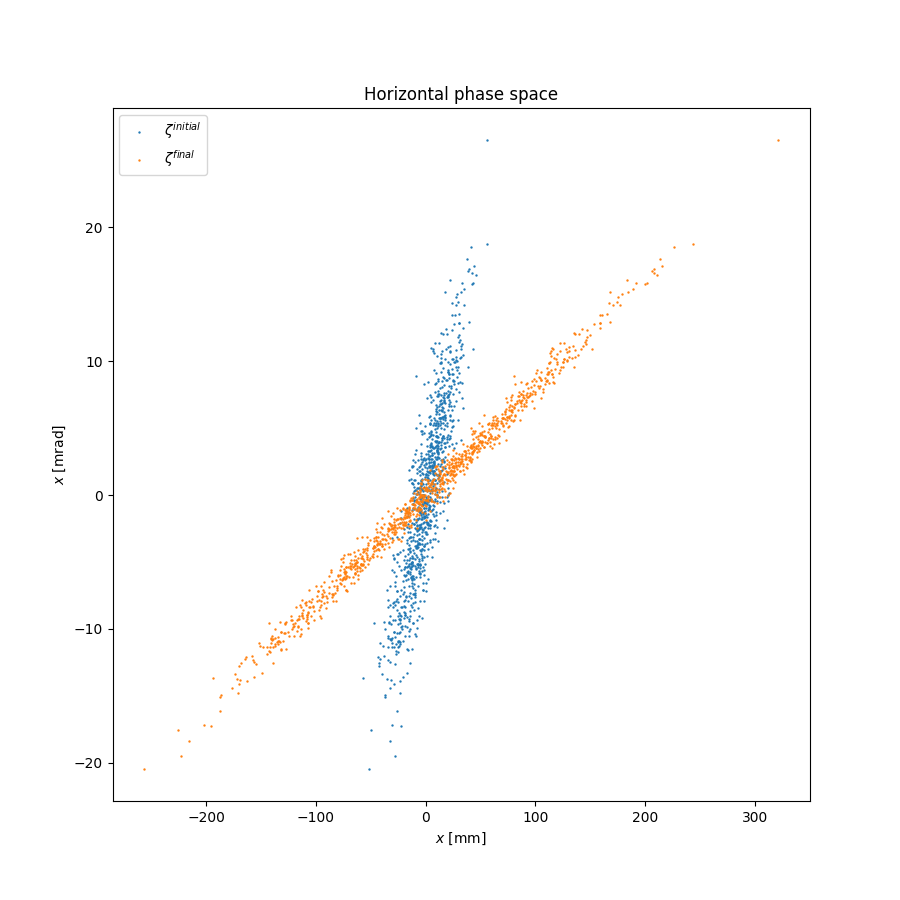

In [18]:
from AcceLEGOrator.Plots import plot_phase_space, plt

# make interactive
%matplotlib notebook

# some plotting
fig = plt.figure(dpi=100)
fig.set_size_inches(9,9)
ax = fig.add_subplot(111)
ax.set_title('Horizontal phase space')
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r"$x$ [mrad]")

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{initial}$')

# apply the drift
D = Drift(10)
bunch.particles = D * bunch.particles

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{final}$')


## Dipole
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Implement the dipole map as given in the lecture slides.</li>
        </ul>
    </div>
</html>

In [6]:
from AcceLEGOrator import Map, Physics, Constants

class Dipole(Map):
    
    # -----------------------------------------------------
    # @param length specified in [m]
    # @param b0 is the magnetic field strength [T]
    # -----------------------------------------------------
    def __init__(self, length, b0):
        beta_0  = Physics.getBeta(p.gamma_0)
        
        self.__b0 = b0
        
        c = Constants.clight
        
        # P_0 = \gamma * \beta * c * m_0 [eV / c]
        P_0 = p.mass * 1e6 / c * p.gamma_0 * beta_0
        w = p.charge / P_0 * self.__b0
        
        cs   = np.cos(w * length)
        s    = np.sin(w * length)
        f    = length / (beta_0 * p.gamma_0) ** 2
        ibet = 1.0 / beta_0
        
        
        D = np.matrix([[cs,         s / w,              0,  0,  0,  (1 - cs) / w * ibet],
                       [-w * s,     cs,                 0,  0,  0,  s * ibet],
                       [0,          0,                  1,  length,  0,  0],
                       [0,          0,                  0,  1,  0,  0],
                       [-s * ibet,  -(1-cs) / w * ibet, 0,  0,  1,  f - (w * length - s) / w * ibet ** 2],
                       [0,          0,                  0,  0,  0,  1]])
        
        super(Dipole, self).__init__(D, length)
    
    
    def __str__(self):
        return 'Dipole(L = ' + str(self.length) \
               + ' [m], B = ' + str(self.__b0) + ' [T])\n'
    
    
    def get(self, length):
        return Dipole(length, self.__b0)

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Apply the map on the created bunch. Plot initial and final phase space.</li>
        </ul>
    </div>
</html>

<IPython.core.display.Javascript object>


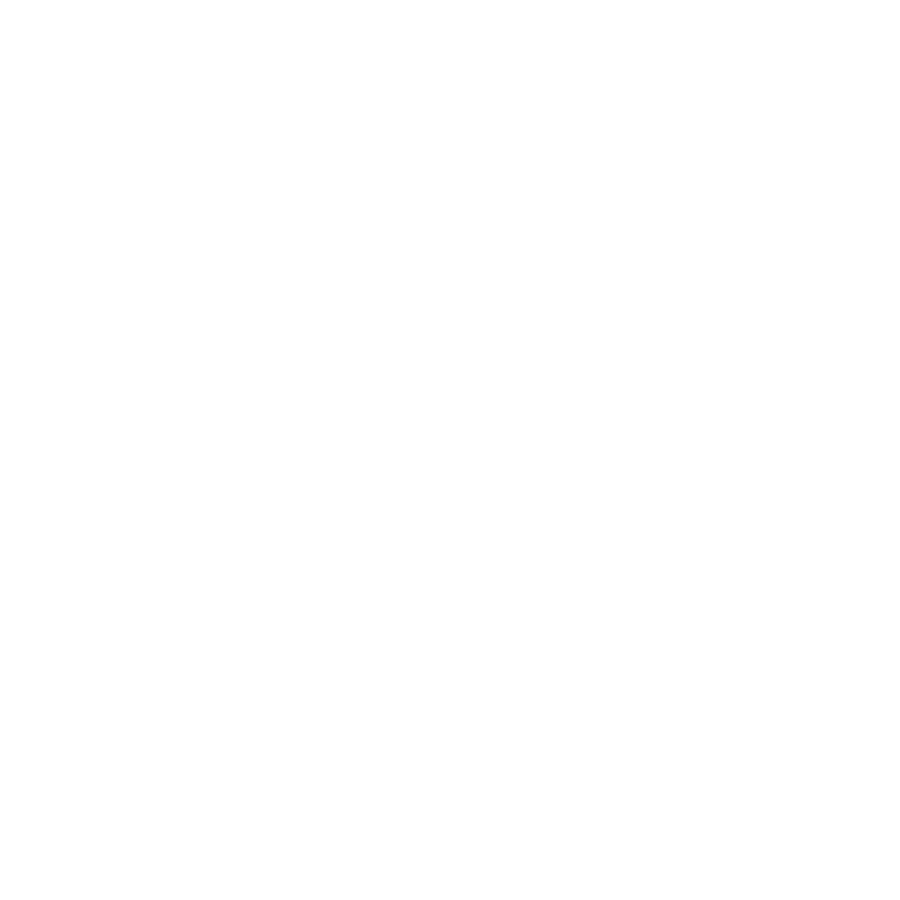

<IPython.core.display.Javascript object>


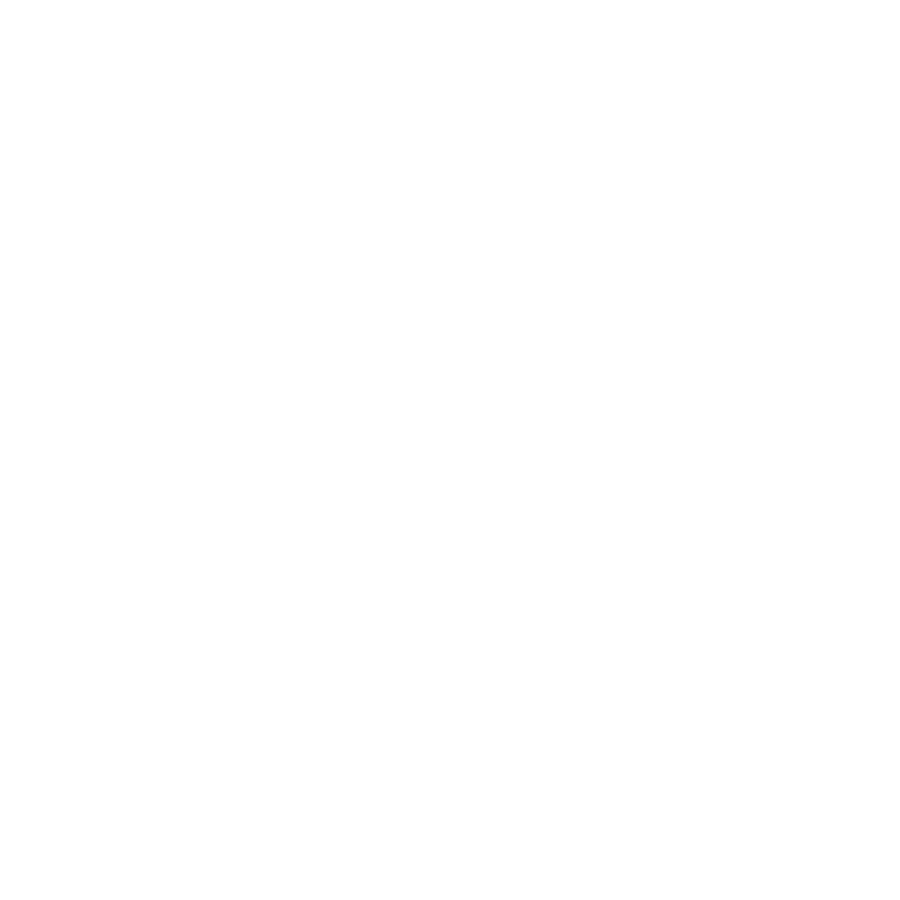

In [7]:
from AcceLEGOrator.Plots import plot_phase_space

# make interactive
%matplotlib notebook

# some plotting
xfig = plt.figure(dpi=100)
xfig.set_size_inches(9,9)
ax = xfig.add_subplot(111)
ax.set_title('Horizontal phase space')
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r"$x$ [mrad]")

yfig = plt.figure(dpi=100)
yfig.set_size_inches(9,9)
ay = yfig.add_subplot(111)
ay.set_title('Vertical phase space')
ay.set_xlabel(r'$y$ [mm]')
ay.set_ylabel(r"$y'$ [mrad]")

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{initial}$')
plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{initial}$')

# apply the dipole
D = Dipole(length=1.0, b0 = 0.7)
bunch.particles = D * bunch.particles

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{final}$')

plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{final}$')

## Quadrupole
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Implement the quadrupole map as given in the lecture slides.</li>
        </ul>
    </div>
</html>

In [8]:
from AcceLEGOrator import Map, Physics, Constants

class Quadrupole(Map):
    # -----------------------------------------------------
    # @param length specified in [m]
    # @param gradB is the magnetic field gradient in [T/m]
    # -----------------------------------------------------
    def __init__(self, length, gradB):
        self.__gradB = gradB
        
        beta_0  = Physics.getBeta(p.gamma_0)
        
        c = Constants.clight
        
        # P_0 = \gamma * \beta * c * m_0 [eV / c]
        P_0 = p.mass * 1e6 / c * p.gamma_0 * beta_0
        w = np.sqrt( p.charge / P_0 * self.__gradB )
            
        cs  = np.cos(w * length)
        s   = np.sin(w * length)
        csh = np.cosh(w * length)
        sh  = np.sinh(w * length)
        f   = length / (beta_0 * p.gamma_0 ) ** 2
            
        Q = np.matrix([[cs,       s / w,  0,      0,      0,  0],
                       [-w * s,   cs,     0,      0,      0,  0],
                       [0,        0,      csh,    sh / w, 0,  0],
                       [0,        0,      w * sh, csh,    0,  0],
                       [0,        0,      0,      0,      1,  f],
                       [0,        0,      0,      0,      0,  1]])
        
        super(Quadrupole, self).__init__(Q, length)
    
    
    def __str__(self):
        return 'Quadrupole(L = ' + str(self.length) \
               + ' [m], grad B = ' + str(self.__gradB) + ' [T/m])\n'
    
    
    def get(self, length):
        return Quadrupole(length, self.__gradB)

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Apply the map on the created bunch. Plot initial and final phase space.</li>
        </ul>
    </div>
</html>

<IPython.core.display.Javascript object>


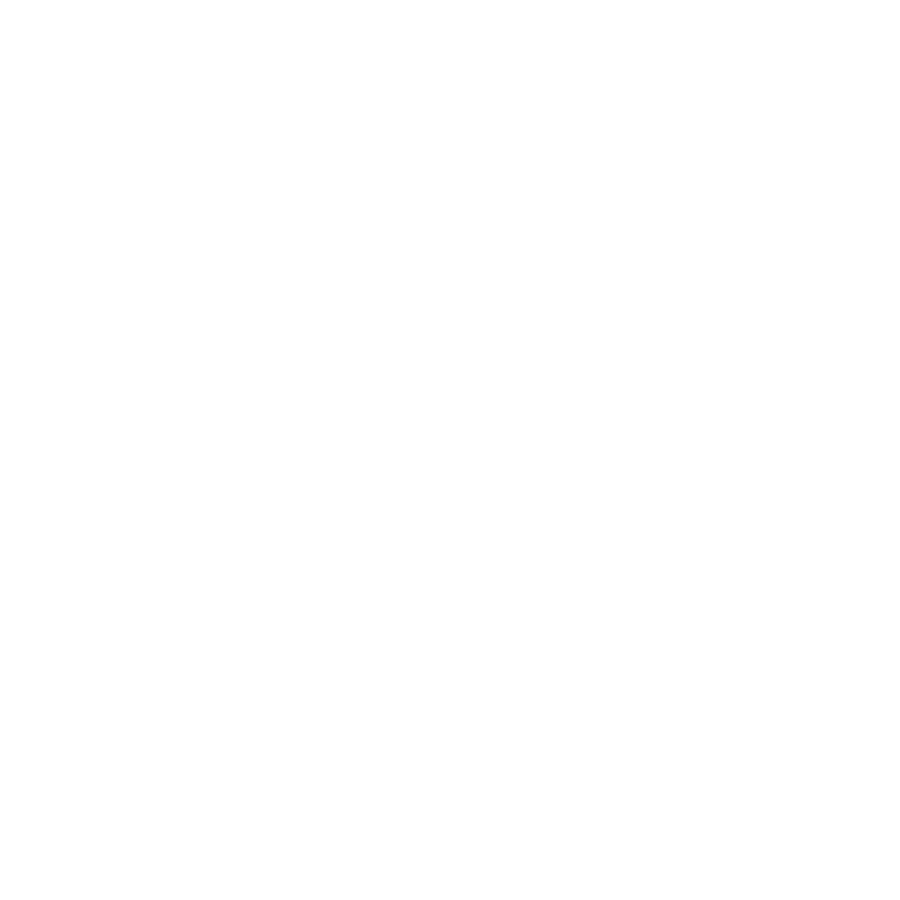

<IPython.core.display.Javascript object>


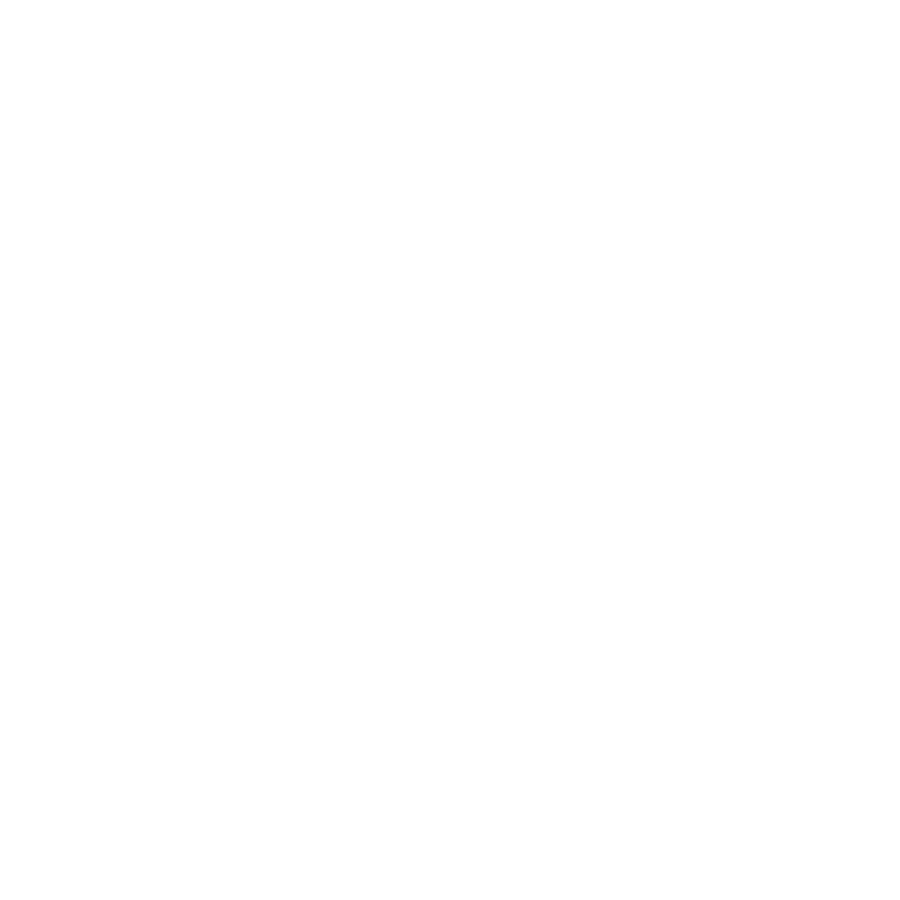

In [9]:
from AcceLEGOrator.Plots import plot_phase_space

# make interactive
%matplotlib notebook

# some plotting
xfig = plt.figure(dpi=100)
xfig.set_size_inches(9,9)
ax = xfig.add_subplot(111)
ax.set_title('Horizontal phase space')
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r"$x$ [mrad]")

yfig = plt.figure(dpi=100)
yfig.set_size_inches(9,9)
ay = yfig.add_subplot(111)
ay.set_title('Vertical phase space')
ay.set_xlabel(r'$y$ [mm]')
ay.set_ylabel(r"$y'$ [mrad]")

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{initial}$')
plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{initial}$')

# apply the dipole
Q = Quadrupole(length=1.0, gradB = 0.5)
bunch.particles = Q * bunch.particles

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{final}$')

plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{final}$')

## Thin Quadrupole
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Implement the thin lens approximation of th quadruopole as given in the lecture slides.</li>
        </ul>
    </div>
</html>

In [10]:
from AcceLEGOrator import Map

class ThinQuadrupole(Map):
    
    def __init__(self, f):
        
        self.f = f
        
        f = 1.0 / f
        
        R = np.matrix([[1, 0, 0, 0, 0, 0],
                      [-f, 1, 0, 0, 0, 0],
                      [0, 0, 1, 0, 0, 0],
                      [0, 0, f, 1, 0, 0],
                      [0, 0, 0, 0, 1, 0],
                      [0, 0, 0, 0, 0, 1]])
        
        super(ThinQuadrupole, self).__init__(R, 0)
    
    def __str__(self):
        return 'ThinQuadrupole(f = ' + str(self.f) + ' )\n'
    
    def get(self, length):
        return ThinQuadrupole(self.f)

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Apply the map on the created bunch. Plot initial and final phase space.</li>
        </ul>
    </div>
</html>

<IPython.core.display.Javascript object>


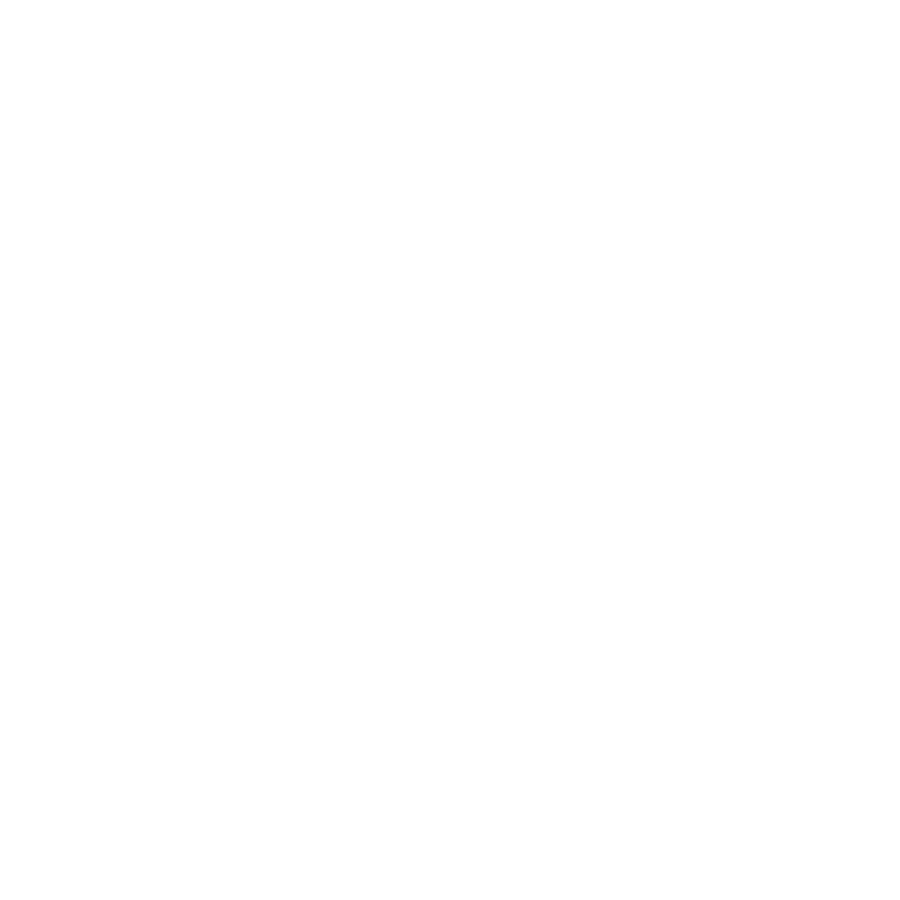

<IPython.core.display.Javascript object>


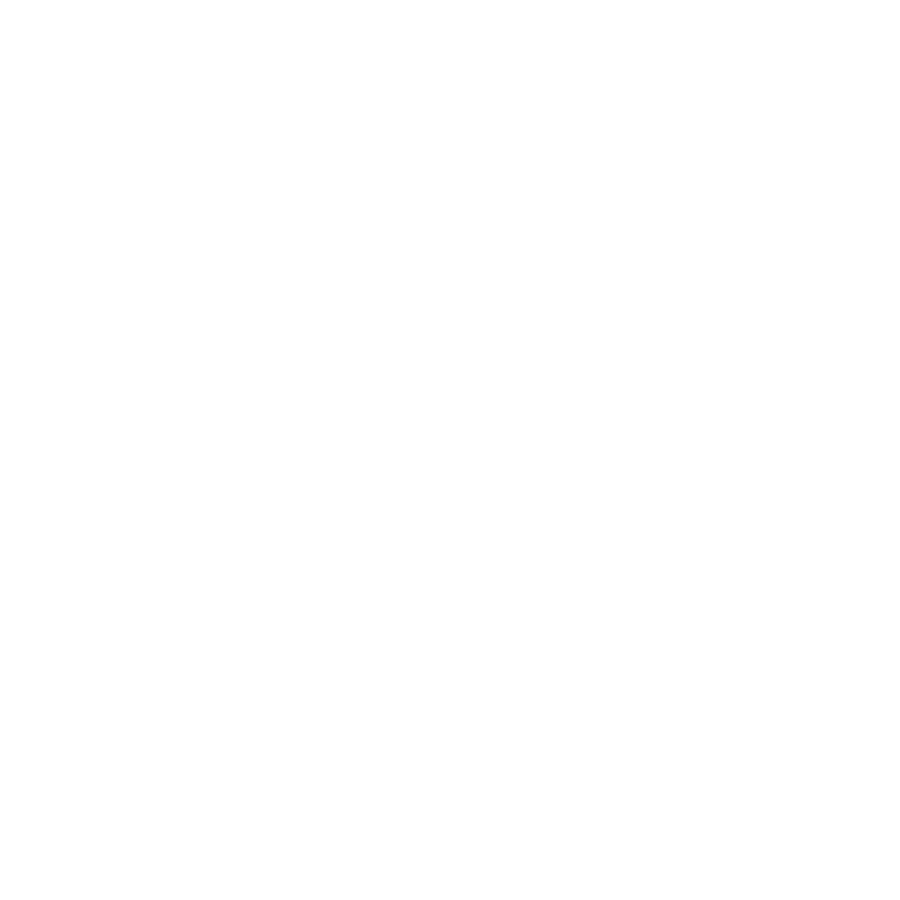

In [11]:
from AcceLEGOrator.Plots import plot_phase_space

# make interactive
%matplotlib notebook

# some plotting
xfig = plt.figure(dpi=100)
xfig.set_size_inches(9,9)
ax = xfig.add_subplot(111)
ax.set_title('Horizontal phase space')
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r"$x$ [mrad]")

yfig = plt.figure(dpi=100)
yfig.set_size_inches(9,9)
ay = yfig.add_subplot(111)
ay.set_title('Vertical phase space')
ay.set_xlabel(r'$y$ [mm]')
ay.set_ylabel(r"$y'$ [mrad]")

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{initial}$')
plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{initial}$')

# apply the dipole
Q = ThinQuadrupole(f = np.sqrt(2))
bunch.particles = Q * bunch.particles

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{final}$')

plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{final}$')

# Solenoid
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Implement the solenoid map as given in the lecture slides.</li>
        </ul>
    </div>
</html>

In [12]:
from AcceLEGOrator import Map, Physics, Constants

class Solenoid(Map):
    # -----------------------------------------------------
    # @param length specified in [m]
    # @param b0 is the magnetic field strength [T]
    # -----------------------------------------------------
    def __init__(self, length, b0):
        beta_0  = Physics.getBeta(p.gamma_0)
        
        self.__b0 = b0
        
        c = Constants.clight
        
        # P_0 = \gamma * \beta * c * m_0 [eV / c]
        P_0 = p.mass * 1e6 / c * p.gamma_0 * beta_0
        w = 0.5 * p.charge / P_0 * self.__b0
        
        cs   = np.cos(w * length)
        cs2  = cs ** 2
        s    = np.sin(w * length)
        s2   = s ** 2
        sw2  = np.sin(2.0 * w * length)
        f    = length / (beta_0 * p.gamma_0) ** 2
        h    = 0.5
        hw   = h * w
        hiw  = h / w
        
        
        S = np.matrix([[cs2,       hiw * sw2,  h * sw2,    s2 / w,     0,  0],
                       [hw * sw2,  cs2,        -w * s2,    h * sw2,    0,  0],
                       [-h * sw2,  -s2 / w,    cs2,        hiw * sw2,  0,  0],
                       [w * s2,    -h * sw2,   -hw * sw2,  cs2,        0,  0],
                       [0,         0,          0,          0,          1,  f],
                       [0,         0,          0,          0,          0,  1]])
        
        super(Solenoid, self).__init__(S, length)
    
    
    def __str__(self):
        return 'Solenoid(L = ' + str(self.length) \
               + ' [m], B = ' + str(self.__b0) + ' [T])\n'
    
    
    def get(self, length):
        return Solenoid(length, self.__b0)

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Apply the map on the created bunch. Plot initial and final phase space.</li>
        </ul>
    </div>
</html>

<IPython.core.display.Javascript object>


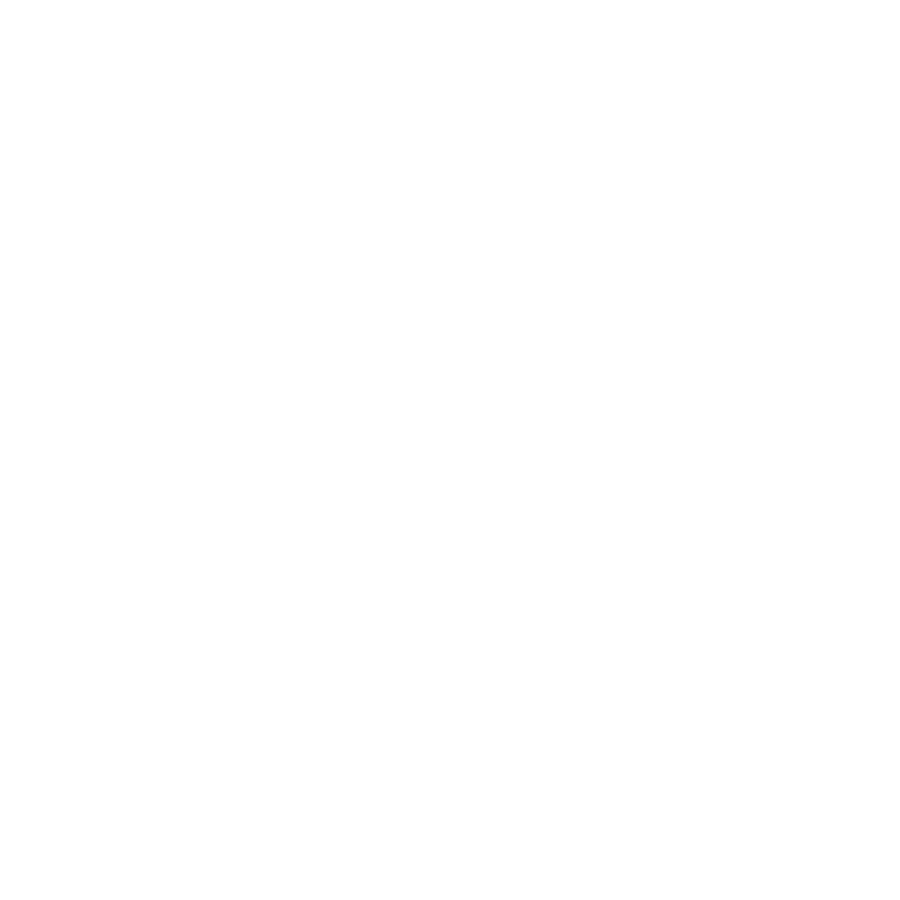

<IPython.core.display.Javascript object>


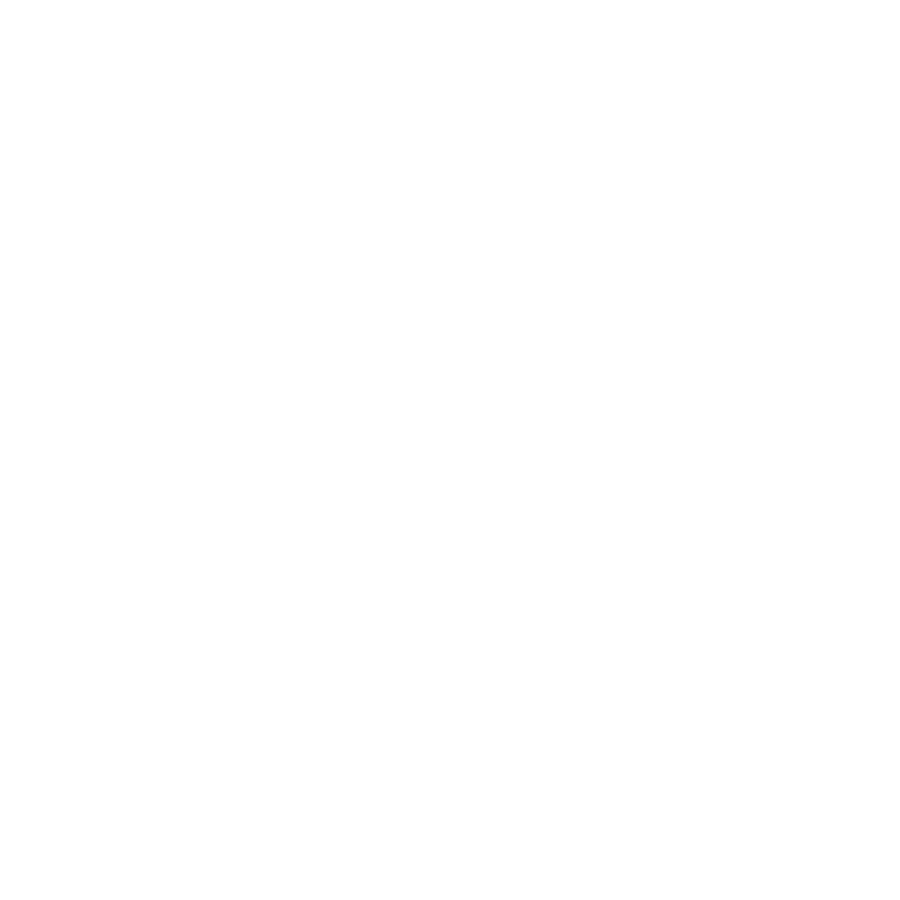

In [13]:
from AcceLEGOrator.Plots import plot_phase_space

# make interactive
%matplotlib notebook

# some plotting
xfig = plt.figure(dpi=100)
xfig.set_size_inches(9,9)
ax = xfig.add_subplot(111)
ax.set_title('Horizontal phase space')
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r"$x$ [mrad]")

yfig = plt.figure(dpi=100)
yfig.set_size_inches(9,9)
ay = yfig.add_subplot(111)
ay.set_title('Vertical phase space')
ay.set_xlabel(r'$y$ [mm]')
ay.set_ylabel(r"$y'$ [mrad]")

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{initial}$')
plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{initial}$')

# apply the solenoid
S = Solenoid(length=1.0, b0 = 0.7)
bunch.particles = S * bunch.particles

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{final}$')

plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{final}$')

# Combined function magnet
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Implement the combined function magnet map as given in the lecture slides.</li>
        </ul>
    </div>
</html>

In [14]:
from AcceLEGOrator import Map, Physics, Constants

class Combined(Map):
    # -----------------------------------------------------
    # @param length specified in [m]
    # @param b0 is the magnetic field in [T]
    # @param gradB is the magnetic field gradient in [T/m]
    # -----------------------------------------------------
    def __init__(self, length, b0, gradB):
        self.__b0 = b0
        self.__gradB = gradB
        
        beta_0  = Physics.getBeta(p.gamma_0)
        
        c = Constants.clight
        
        # P_0 = \gamma * \beta * c * m_0 [eV / c]
        P_0 = p.mass * 1e6 / c * p.gamma_0 * beta_0
        
        # reference path --> k0 = h
        k0 = p.charge / P_0 * self.__b0
        k1 = p.charge / P_0 * self.__gradB
        
        wx = np.sqrt(k0 ** 2 + k1)
        wy = np.sqrt(k1)

        
        cs   = np.cos(wx * length)
        s    = np.sin(wx * length)
        
        csh  = np.cosh(wy * length)
        sh   = np.sinh(wy * length)
        
        kb = k0 / beta_0
        ct = (1.0 - cs) / wx ** 2
        st = s / wx
        f  = length / (beta_0 * p.gamma_0) ** 2
        zt = kb ** 2 * ( wx * length - s ) / wx ** 3
        
        
        C = np.matrix([[cs,        s / wx,    0,        0,        0,  kb * ct],
                       [-wx * s,   cs,        0,        0,        0,  kb * st],
                       [0,         0,         csh,      sh / wy,  0,  0],
                       [0,         0,         wy * sh,  csh,      0,  0],
                       [-kb * st,  -kb * ct,  0,        0,        1,  f - zt],
                       [0,         0,         0,        0,        0,  1]])
        
        super(Combined, self).__init__(C, length)
    
    
    def __str__(self):
        return 'Combined(L = ' + str(self.length) \
               + ' [m], B = ' + str(self.__b0) \
               + ' [T], grad B = ' + str(self.__gradB) + ' [T/m])\n'
    
    
    def get(self, length):
        return Combined(length, self.__b0, self.__gradB)

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Apply the map on the created bunch. Plot initial and final phase space.</li>
        </ul>
    </div>
</html>

<IPython.core.display.Javascript object>


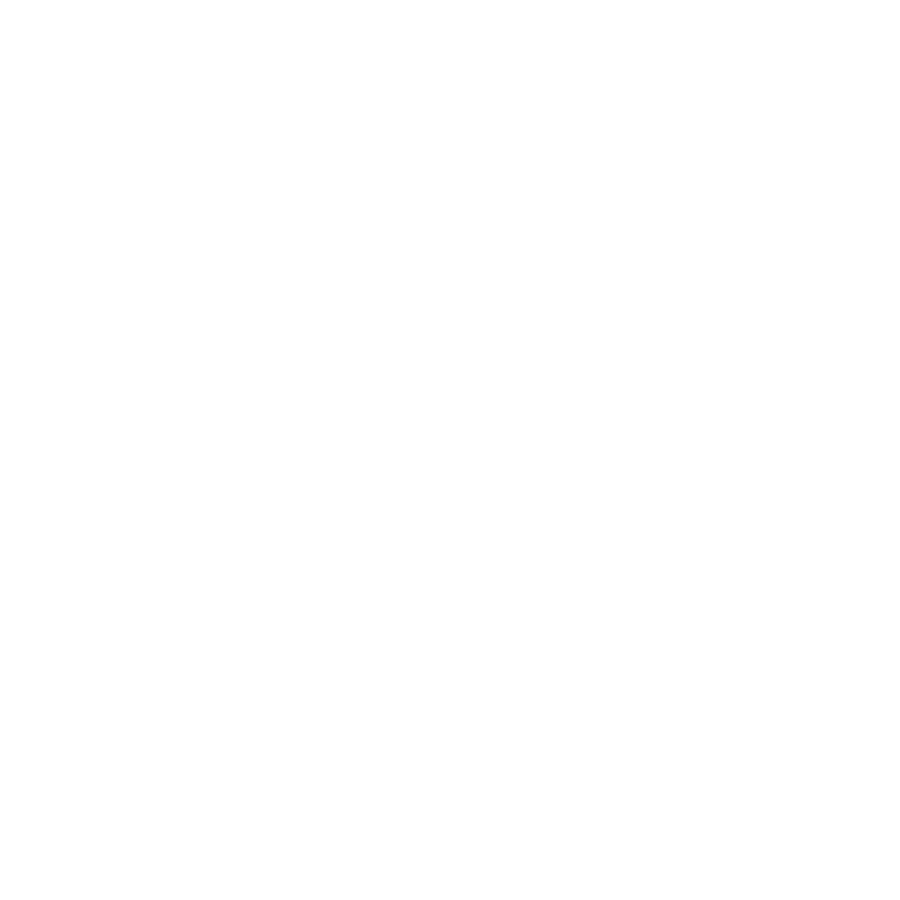

<IPython.core.display.Javascript object>


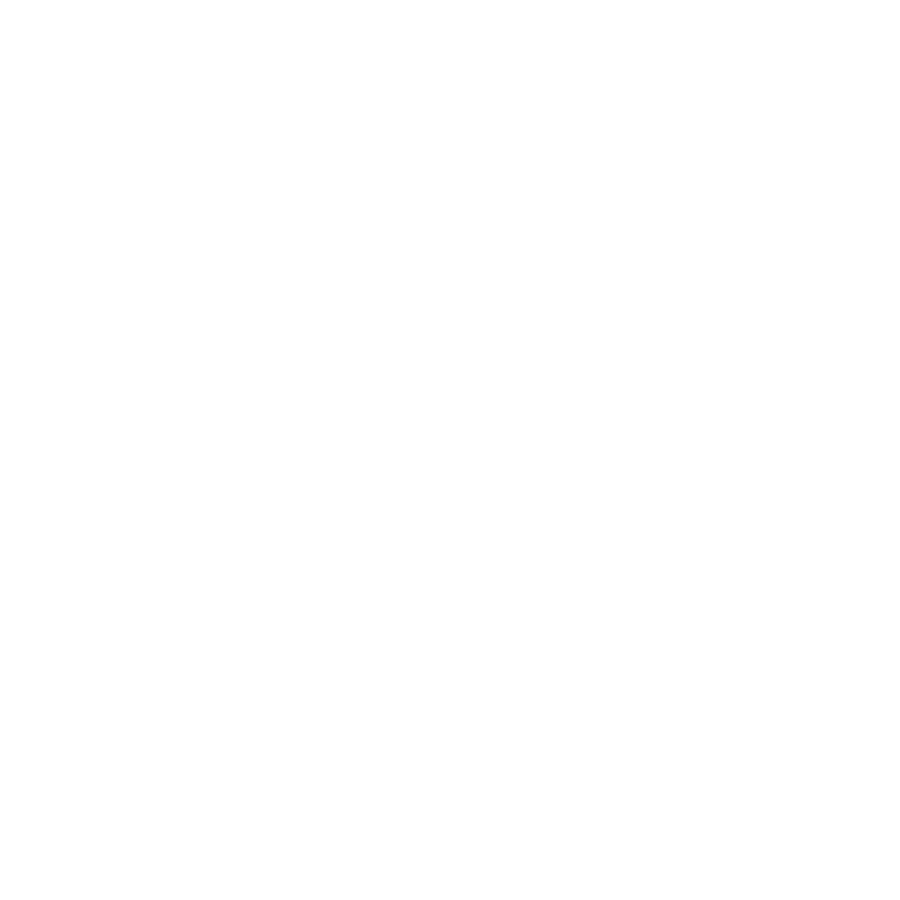

In [15]:
from AcceLEGOrator.Plots import plot_phase_space

# make interactive
%matplotlib notebook

# some plotting
xfig = plt.figure(dpi=100)
xfig.set_size_inches(9,9)
ax = xfig.add_subplot(111)
ax.set_title('Horizontal phase space')
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r"$x$ [mrad]")

yfig = plt.figure(dpi=100)
yfig.set_size_inches(9,9)
ay = yfig.add_subplot(111)
ay.set_title('Vertical phase space')
ay.set_xlabel(r'$y$ [mm]')
ay.set_ylabel(r"$y'$ [mrad]")

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{initial}$')
plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{initial}$')

# apply the solenoid
C = Combined(length=1.0, b0 = 0.7, gradB = 0.5)
bunch.particles = C * bunch.particles

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{final}$')

plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{final}$')

# Fringe Field
<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Implement the frnge field map as given in the lecture slides.</li>
        </ul>
    </div>
</html>

In [16]:
from AcceLEGOrator import Map, Physics, Constants

class Fringe(Map):
    
    # -----------------------------------------------------
    # @param b0 is the magnetic field strength [T]
    # @param angle [deg]
    # -----------------------------------------------------
    def __init__(self, b0, angle):
        beta_0  = Physics.getBeta(p.gamma_0)
        
        self.__b0 = b0
        self.__angle = angle
        
        c = Constants.clight
        
        # P_0 = \gamma * \beta * c * m_0 [eV / c]
        P_0 = p.mass * 1e6 / c * p.gamma_0 * beta_0
        
        angle = np.deg2rad(angle)
        k1 = - p.charge / P_0 * self.__b0 * np.tan(angle)
        
        F = np.matrix([[1,   0,  0,  0,  0,  0],
                       [-k1, 1,  0,  0,  0,  0],
                       [0,   0,  1,  0,  0,  0],
                       [0,   0,  k1, 1,  0,  0],
                       [0,   0,  0,  0,  1,  0],
                       [0,   0,  0,  0,  0,  1]])
        
        super(Fringe, self).__init__(F, 0)
    
    
    def __str__(self):
        return 'Fringe(B = ' + str(self.__b0) \
                + ' [T], angle = ' + str(self.__angle) + ' [deg])\n'
    
    
    def get(self, length):
        return Fringe(self.__b0, self.__angle)

<html>
    <div class="alert alert-info" style="background-color:rgba(255, 0, 0, 0.6);
                                         margin-top:10px;
                                         color:white;
                                         border-color:rgba(255, 0, 0, 0.3)">
        <strong>TODO:</strong>
        <ul>
            <li>Apply a dipole with fringe field on the created bunch. Plot initial and final phase space.</li>
        </ul>
    </div>
</html>

<IPython.core.display.Javascript object>


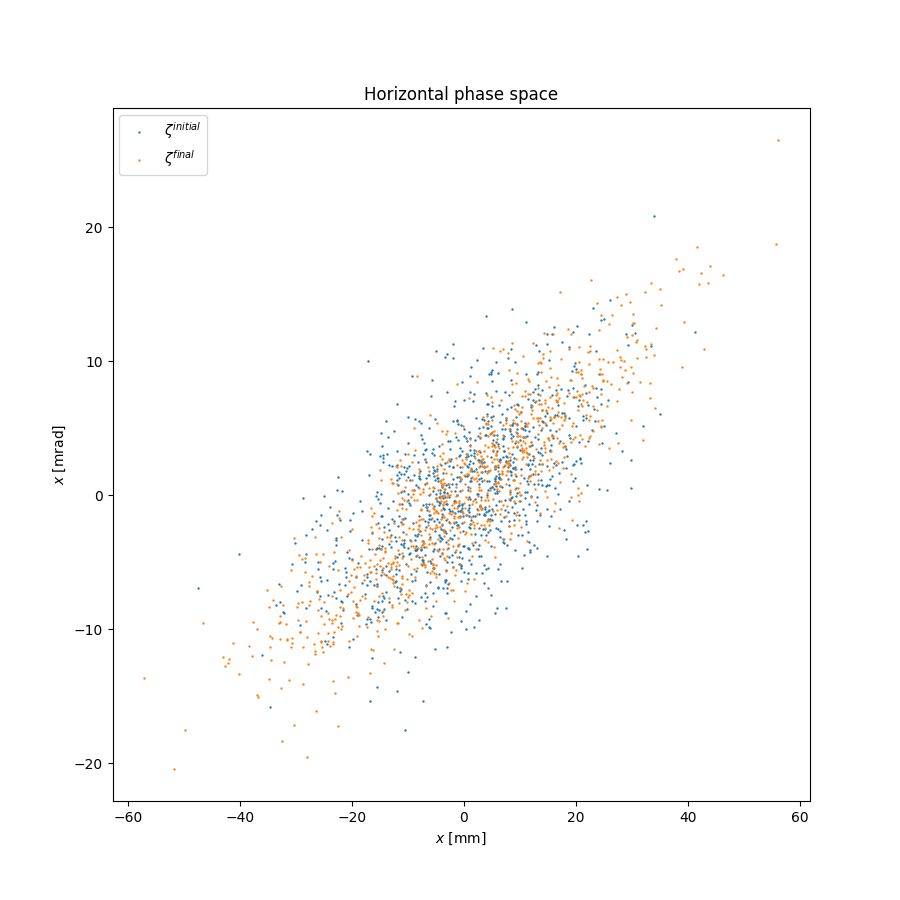

<IPython.core.display.Javascript object>


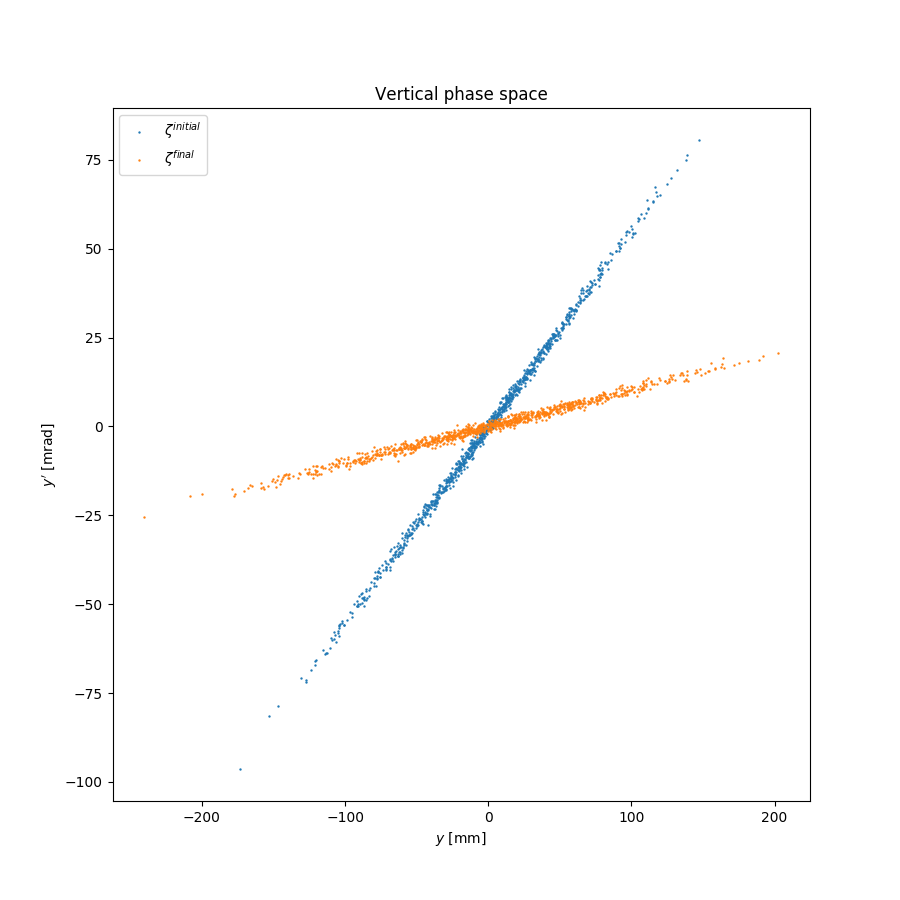

In [17]:
from AcceLEGOrator.Plots import plot_phase_space

# make interactive
%matplotlib notebook

# some plotting
xfig = plt.figure(dpi=100)
xfig.set_size_inches(9,9)
ax = xfig.add_subplot(111)
ax.set_title('Horizontal phase space')
ax.set_xlabel(r'$x$ [mm]')
ax.set_ylabel(r"$x$ [mrad]")

yfig = plt.figure(dpi=100)
yfig.set_size_inches(9,9)
ay = yfig.add_subplot(111)
ay.set_title('Vertical phase space')
ay.set_xlabel(r'$y$ [mm]')
ay.set_ylabel(r"$y'$ [mrad]")

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{initial}$')
plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{initial}$')

# apply the dipole
D = Dipole(length=1.0, b0 = 0.7)
F = Fringe(b0 = 0.7, angle = 20)
bunch.particles = F * D * F * bunch.particles

plot_phase_space(ax, bunch['x'], bunch["x'"], r'$\zeta^{final}$')

plot_phase_space(ay, bunch['y'], bunch["y'"], r'$\zeta^{final}$')